# AI in Medicine: Data Science - Basics I
 
## Python Programming: `numpy` and `pandas`

- **Instructor**: Dominique Sydow, AG Volkamer, Charité (dominique.sydow@charite.de)
- **Target audience**: Medical students from the Charité
- **Course date**: February 2021

## 1. Aims of this session

In this talktorial, you will get in touch with **data science**. Using the **Python packages `numpy` and `pandas`**, you will load and work with the RKI COVID-19 dataset for Berlin.

## 2. Learning goals

### Theory

* Data science
* The `numpy` library
* The `pandas` library

### Practical

1. Dataset
2. Read data with `pandas` as `DataFrame`
3. Look at data
4. Select columns
5. Get unique entries in a column
6. Group data

## 3. References

- Data science, machine learning, artificial intelligence
  - http://varianceexplained.org/r/ds-ml-ai/
- Vectors, matrices, tensors
  - https://www.quantstart.com/articles/scalars-vectors-matrices-and-tensors-linear-algebra-for-deep-learning-part-1/
  - https://dev.to/mmithrakumar/scalars-vectors-matrices-and-tensors-with-tensorflow-2-0-1f66
- `numpy`
  - https://numpy.org/doc/stable/user/absolute_beginners.html
  - https://scipy-lectures.org/intro/numpy/array_object.html
- `pandas`
  - https://medium.com/dunder-data/how-to-learn-pandas-108905ab4955
  - https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/#iloc-selection
  - https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c
- RKI COVID-19 dataset for Berlin
  - https://npgeo-corona-npgeo-de.hub.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0/data?orderBy=Bundesland&where=Bundesland%20%3D%20%27Berlin%27
- LaGeSo dataset for Berlin's districts
  - https://www.berlin.de/lageso/gesundheit/infektionsepidemiologie-infektionsschutz/corona/tabelle-bezirke/
- Dataset on vaccination progress in Germany
  - https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Daten/Impfquoten-Tab.html

## 4. Theory

### Data Science

#### What is the difference between data science, machine learning, and artificial intelligence? 

Adapted from [David Robinson's blog post](http://varianceexplained.org/r/ds-ml-ai/).

The fields data science, machine learning, and artificial intelligence do have a great deal of **overlap**, but they are **not interchangeable**.

#### **Data science** produces **insights**
  - “The average patient has a 70% chance of survival” (descriptive: describe a dataset)
  - “Different patients have different chances of survival” (exploratory: find relationships you did not know about)  
  - “A randomized experiment shows that patients assigned to Alice are more likely to survive than those assigned to Bob” (correlation: find out what happens to one variable when you make another variable change)

#### **Machine learning** (ML) produces **predictions**
  - "Predict whether this patient will go into sepsis”
  - “Predict whether this image has a bird in it"

#### **Artificial intelligence** (AI) produces **actions**
  - Game-playing algorithms (Deep Blue, AlphaGo)
  - Robotics and control theory (motion planning, walking a bipedal robot)
  - Optimization (Google Maps choosing a route)

### The `numpy` library

#### Overview

* Role: Scientific computing (with arrays)
* Website: https://numpy.org/
* Description (taken from [here](https://numpy.org/doc/stable/user/absolute_beginners.html)):
> NumPy (Numerical Python) is an open source Python library that’s used in almost every field of science and engineering. It’s the universal standard for working with numerical data in Python, and it’s at the core of the scientific Python and PyData ecosystems. NumPy users include everyone from beginning coders to experienced researchers doing state-of-the-art scientific and industrial research and development. The NumPy API is used extensively in Pandas, SciPy, Matplotlib, scikit-learn, scikit-image and most other data science and scientific Python packages.
* Documentation: https://numpy.org/devdocs/

#### Applications

- Create vectors (1D), matrices (2D), tensors (>= 3D) in the form of arrays
- Use a large collection of high-level mathematical functions to operate on these arrays
- Used extensively in `pandas`, `scipy`, `matplotlib`, `scikit-learn` and most other data science and scientific Python packages

![](https://res.cloudinary.com/practicaldev/image/fetch/s--oTgfo1EL--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://raw.githubusercontent.com/adhiraiyan/DeepLearningWithTF2.0/master/notebooks/figures/fig0201a.png)

Figure source: https://dev.to/mmithrakumar/scalars-vectors-matrices-and-tensors-with-tensorflow-2-0-1f66

### The `pandas` library

#### Overview

* Role: Data manipulation and analysis
* Website: https://pandas.pydata.org/
* Description (taken from [here](https://pandas.pydata.org/)):
> Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. 
* Documentation: https://pandas.pydata.org/pandas-docs/stable/

#### Applications

Taken from: https://medium.com/dunder-data/how-to-learn-pandas-108905ab4955

> `pandas` is capable of many tasks including:
>
> * Reading/writing many different data formats
> * Selecting subsets of data
> * Calculating across rows and down columns
> * Finding and filling missing data
> * Applying operations to independent groups within the data
> * Reshaping data into different forms
> * Visualization through matplotlib and seaborn

#### `DataFrame` and `Series`

The `pandas` library has two main containers of data, the `DataFrame` (2D) and the `Series` (1D). 

- `DataFrame` [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html):
  > Two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). Arithmetic operations align on both row and column labels. Can be thought of as a dict-like container for Series objects. The primary pandas data structure
- `Series` [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html):
  > One-dimensional ndarray with axis labels (including time series).


The `DataFrame` is used more than the `Series`, so let’s take a look at its components.

![DataFrame anatomy](https://github.com/volkamerlab/ai_in_medicine/raw/update-2021.02/images/dataframe_anatomy.png)

Figure source: https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c

## 5. Practical

<div class="alert alert-block alert-info">
    <b>Our aim:</b> We will walk through all functionalities in pandas that we will need to visualize the latest COVID-19 case numbers for Berlin by age group and district. After you have seen how this can be done, you will get the latest data for the German vaccination progress and will plot the time course of first/second vaccinations yourself.
</div>

### 5.1. Dataset

We will work with the data on COVID-19 cases which is daily published by the Robert-Koch-Institut (RKI) and is visualized very nicely on the RKI COVID-19 Dashboard (https://corona.rki.de). 
In this notebook we will focus on data for Berlin.

The dataset is freely available [here](https://npgeo-corona-npgeo-de.hub.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0): We can load the dataset directly into `pandas` from this URL: https://opendata.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0.csv

### 5.2. Read data with `pandas` as `DataFrame`

In [1]:
import numpy as np
import pandas as pd

First, we import the libraries `numpy` and `pandas` (abbreviated as `np` and `pd` so that we can write shorter code from here on). Libraries are a collection of functionalities that enable you to perform many common tasks without writing the whole code yourself from scratch.

For instance, the `pandas` library provides the function `read_csv()` to read a comma-separated values (csv) file into a so-called `DataFrame`.

**Tip**: You can check out available functionalities of a library in this Jupyter notebook, by writing the library name followed by a dot and then hitting the tab key. All available functionalities will pop up for you to explore. Since there are a lot of options, you can narrow it down by writing e.g. `read` while the popup windows is up. 

**Note**: If you are working in in Google Colab you will first have to disable `Automatically trigger code completions` on `Tools` > `Settings` > `Editor` in order to be able to use this feature.

See for yourself all the possible file formats that you can read with `pandas`:

If we execute (with `Enter`) this cell, we get an `AttributeError` because the module `pandas` does not know `read()`.

We can also use `?` to get a function's docstring, i.e. a description of what the function does and what kind of parameters we can pass!

We will now use the `read_csv()` function ([see docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)) to load the csv file content as `DataFrame` into the variable `data`.

In [2]:
# `read_csv` takes paths in your computer, but also Internet URLs!
# Reading the remote csv file takes a couple of seconds
data = pd.read_csv("https://opendata.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0.csv", delimiter=',')

Let's take a look at that `DataFrame` in `data`.

### 5.3. Look at data

#### `DataFrame` head/tail

Let's have a look at the first few rows of the table using the `head()` function ([see docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html)). 

**Note**: We will use this command a lot to avoid printing large tables in this Jupyter notebook.

In [3]:
data.head()  # Shows by default the first 5 entries

,ObjectId,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
0,1,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020/09/30 00:00:00,1001,"03.02.2021, 00:00 Uhr",0,-9,2020/09/30 00:00:00,0,1,0,Nicht übermittelt
1,2,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020/10/29 00:00:00,1001,"03.02.2021, 00:00 Uhr",0,-9,2020/10/29 00:00:00,0,1,0,Nicht übermittelt
2,3,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020/11/03 00:00:00,1001,"03.02.2021, 00:00 Uhr",0,-9,2020/11/03 00:00:00,0,1,0,Nicht übermittelt
3,4,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020/11/20 00:00:00,1001,"03.02.2021, 00:00 Uhr",0,-9,2020/11/19 00:00:00,0,1,1,Nicht übermittelt
4,5,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020/11/23 00:00:00,1001,"03.02.2021, 00:00 Uhr",0,-9,2020/11/18 00:00:00,0,1,1,Nicht übermittelt


Let's have a look at the last few rows of the table using the `tail()` function ([see docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html)). Note that you can pass a number to the `head()` and `tail()` functions to specify how many first/last rows you want to see.

In [4]:
data.tail(2)

,ObjectId,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
1167490,1167491,16,Thüringen,LK Altenburger Land,A15-A34,M,7,0,2021/01/07 00:00:00,16077,"03.02.2021, 00:00 Uhr",0,-9,2021/01/07 00:00:00,-9,0,0,Nicht übermittelt
1167491,1167492,16,Thüringen,LK Altenburger Land,A15-A34,M,4,0,2021/01/08 00:00:00,16077,"03.02.2021, 00:00 Uhr",0,-9,2021/01/08 00:00:00,-9,0,0,Nicht übermittelt


#### `DataFrame` dimensionality

Let's show the number of columns and rows (= dimensionality/shape) of the table in the form of `(number of rows, number of columns)` using `shape`.

In [5]:
data.shape

(1167492, 18)

#### `DataFrame` column names

We can get all columns names using `columns`.

In [6]:
data.columns

Index(['ObjectId', 'IdBundesland', 'Bundesland', 'Landkreis', 'Altersgruppe',
       'Geschlecht', 'AnzahlFall', 'AnzahlTodesfall', 'Meldedatum',
       'IdLandkreis', 'Datenstand', 'NeuerFall', 'NeuerTodesfall', 'Refdatum',
       'NeuGenesen', 'AnzahlGenesen', 'IstErkrankungsbeginn', 'Altersgruppe2'],
      dtype='object')

Let's list here the meaning of a few criteria (see full list on [RKI COVID-19 data download website](https://www.arcgis.com/home/item.html?id=dd4580c810204019a7b8eb3e0b329dd6)):

- `Bundesland`: State name
- `Landkreis`: District name
- `Altersgruppe`: Age group (6 groups: `0-4`, `5-14`, `15-34`, `35-59`, `60-79`, `80+` and `unbekannt`=unknown)
- `Geschlecht`: Gender (`M`=male, `W`=female and `unbekannt`=unknown)
- `AnzahlFall`: Number of cases in group
- `AnzahlTodesfall`: Number of deaths in group
- `AnzahlGenesen`: Number of recoveries cases in group
- `Meldedatum`: Date when case was reported to the Gesundheitsamt (you will use this in the next lesson on data visualization with `matplotlib`)
- `Datenstand`: Date when data was updated

We can think of a `DataFrame` as a list of lists (whereby each list can contain different datatypes) which is shown as a table with metadata such as column and index names.

In [7]:
list_of_lists = [['Helen', 20, 'female'], ['Paul', 25, 'male'], ['Kim', 35, 'female']]
list_of_lists

[['Helen', 20, 'female'], ['Paul', 25, 'male'], ['Kim', 35, 'female']]

In [8]:
pd.DataFrame(list_of_lists, columns=['name', 'age', 'gender'])

,name,age,gender
0,Helen,20,female
1,Paul,25,male
2,Kim,35,female


Just to stress this point in reverse: It is also possible to transform our `pandas` `DataFrame` back to a 2D `numpy` matrix (a list of lists).

In [9]:
data.to_numpy()

array([[1, 1, 'Schleswig-Holstein', ..., 1, 0, 'Nicht übermittelt'],
       [2, 1, 'Schleswig-Holstein', ..., 1, 0, 'Nicht übermittelt'],
       [3, 1, 'Schleswig-Holstein', ..., 1, 0, 'Nicht übermittelt'],
       ...,
       [1167490, 16, 'Thüringen', ..., 3, 0, 'Nicht übermittelt'],
       [1167491, 16, 'Thüringen', ..., 0, 0, 'Nicht übermittelt'],
       [1167492, 16, 'Thüringen', ..., 0, 0, 'Nicht übermittelt']],
      dtype=object)

#### _Your turn_: Exercises

Let's meet in small groups and work on a few exercises. Afterwards, we will discuss them shortly together.

__Exercise 1__: Get (a) the first 4 rows and (b) the last 5 rows in `data`

__Exercise 2__: Get (a) the number of columns and (b) the third column name in `data`

__Exercise 3__: Set up a `DataFrame` containing data on 4 countries:
- Country name
- Your favorite thing about this country
- Have you been there already?

### 5.4 Select columns

#### By column name

Let's select some interesting columns! The `DataFrame` is quite large and we are only interested in a subset of the offered criteria. With `pandas`, it is very easy to slice the columns that you want by the following syntax:

```python
data[list_of_interesting_columns]
```

The list of column names of interest could look like this:
```python
list_of_interesting_columns = ['Bundesland', 'Landkreis']
```

Taking both steps together it looks like this (note the two sets of `[]`, the inner `[]` is part of the list, the outer `[]` is the syntax for `DataFrame` slicing):

In [10]:
data[['Bundesland', 'Landkreis']].head()  # Note the use of .head() to show only the first 5 rows

,Bundesland,Landkreis
0,Schleswig-Holstein,SK Flensburg
1,Schleswig-Holstein,SK Flensburg
2,Schleswig-Holstein,SK Flensburg
3,Schleswig-Holstein,SK Flensburg
4,Schleswig-Holstein,SK Flensburg


Now, let's select all columns of interest in this Jupyter notebook and overwrite `data` with this selection.

We see in the following that it is possible to write a command over multiple lines to make is easier to read.

In [11]:
data = data[
    [
        'Bundesland', 
        'Landkreis', 
        'Altersgruppe', 
        'Geschlecht', 
        'AnzahlFall', 
        'AnzahlTodesfall', 
        'AnzahlGenesen', 
        'Datenstand'
    ]
]

In [12]:
data.head()

,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,AnzahlGenesen,Datenstand
0,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,1,"03.02.2021, 00:00 Uhr"
1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,1,"03.02.2021, 00:00 Uhr"
2,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,1,"03.02.2021, 00:00 Uhr"
3,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,1,"03.02.2021, 00:00 Uhr"
4,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,1,"03.02.2021, 00:00 Uhr"


#### By column AND index names/indices using `loc/iloc`

1. __Recap__

So far we sliced columns using column names like this:

In [13]:
data[['Bundesland', 'Landkreis']].head()

,Bundesland,Landkreis
0,Schleswig-Holstein,SK Flensburg
1,Schleswig-Holstein,SK Flensburg
2,Schleswig-Holstein,SK Flensburg
3,Schleswig-Holstein,SK Flensburg
4,Schleswig-Holstein,SK Flensburg


2. __`loc`__

The above code is a shorter form for using `loc`:
```python
dataframe.loc[list_of_row_names, list_of_column_names]
```
`index_names` or `column_names` can be set to `:` if we want to select the full row or column, respectively.

In [14]:
data.loc[:, ['Bundesland', 'Landkreis']].head()

,Bundesland,Landkreis
0,Schleswig-Holstein,SK Flensburg
1,Schleswig-Holstein,SK Flensburg
2,Schleswig-Holstein,SK Flensburg
3,Schleswig-Holstein,SK Flensburg
4,Schleswig-Holstein,SK Flensburg


3. __`iloc`__

Or, instead of row and column names, we can use their indices (like you learnt on day 1 where you selected elements from a list). 

```python
dataframe.iloc[list_of_row_indices, list_of_column_indices].head()
```

Remember, in Python indices are 0-indexed.

In [15]:
# Check out index of columns of interest
data.columns

Index(['Bundesland', 'Landkreis', 'Altersgruppe', 'Geschlecht', 'AnzahlFall',
       'AnzahlTodesfall', 'AnzahlGenesen', 'Datenstand'],
      dtype='object')

In [16]:
data.iloc[:, [2, 3]].head()

,Altersgruppe,Geschlecht
0,A00-A04,M
1,A00-A04,M
2,A00-A04,M
3,A00-A04,M
4,A00-A04,M


__Note__: You will use `loc/iloc` in the notebooks to come in the next lessons, but for this lesson here, we will use column selection by column names as discussed first:

In [17]:
data[['Bundesland', 'Landkreis']].head()

,Bundesland,Landkreis
0,Schleswig-Holstein,SK Flensburg
1,Schleswig-Holstein,SK Flensburg
2,Schleswig-Holstein,SK Flensburg
3,Schleswig-Holstein,SK Flensburg
4,Schleswig-Holstein,SK Flensburg


#### _Your turn_: Exercises

Let's meet in small groups and work on a few exercises. Afterwards, we will discuss them shortly together.

__Exercise 4__: Select the columns listing the number of cases, deaths and recoveries using their __column names__.

__Exercise 5__: Do the same as in Exercise 4 but this time use __`loc`__.

__Exercise 6__: Do the same as in Exercise 4 and 5 but this time use __`iloc`__.

### 5.5 Get unique entries in a column

Now, we'd like to check what kind of entries we can find in a column. 

First, we select a column, similar to how we learned it in *Chapter 5.4*. Since we select this time only **one** column, we do not pass the column name as a list but as a simple string.

In [18]:
data['Bundesland'].head()

0    Schleswig-Holstein
1    Schleswig-Holstein
2    Schleswig-Holstein
3    Schleswig-Holstein
4    Schleswig-Holstein
Name: Bundesland, dtype: object

This returns a `Series` (instead of a `DataFrame`):

In [19]:
type(data['Bundesland'])

pandas.core.series.Series

Now let's apply the `unique()` function ([see docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html)) and check the states in our dataset.

In [20]:
data['Bundesland'].unique()  # Note: Here we pass the single column as string not as list (as shown in Chapter 5.4)

array(['Schleswig-Holstein', 'Hamburg', 'Niedersachsen', 'Bremen',
       'Nordrhein-Westfalen', 'Hessen', 'Rheinland-Pfalz',
       'Baden-Württemberg', 'Bayern', 'Saarland', 'Berlin', 'Brandenburg',
       'Mecklenburg-Vorpommern', 'Sachsen', 'Sachsen-Anhalt', 'Thüringen'],
      dtype=object)

There should be 16 states, let's check with Python's built-in function `len` ([see docs](https://docs.python.org/3/library/functions.html#len)) that returns the length of e.g. list-like objects:

In [21]:
len(data['Bundesland'].unique())

16

Another example: Check the date of data update (`'Datenstand'`).

In [22]:
data['Datenstand'].unique()

array(['03.02.2021, 00:00 Uhr'], dtype=object)

#### _Your turn_: Exercises

Let's meet in small groups and work on a few exercises. Afterwards, we will discuss them shortly together.

__Exercise 7__: Select the column on age groups (`'Altersgruppe'`) - which age groups are monitored?

__Exercise 8__: Select the column on districts (`'Landkreis'`) - how many districts are monitored?

### 5.6. Select rows (by conditions)

Very often, you not only have more criteria (columns) in your dataset than you are actually interested in but also more data points (rows) than you need. Let's say for instance, that we are mainly interested in data points regarding Berlin. Since we have a dataset for Germany, we will need to do some (row) filtering.

Let's select only the state column (`Bundesland`).

In [23]:
data['Bundesland']

0          Schleswig-Holstein
1          Schleswig-Holstein
2          Schleswig-Holstein
3          Schleswig-Holstein
4          Schleswig-Holstein
                  ...        
1167487             Thüringen
1167488             Thüringen
1167489             Thüringen
1167490             Thüringen
1167491             Thüringen
Name: Bundesland, Length: 1167492, dtype: object

With `Series` it is very easy to check for each row if it fullfils a given condition. As an example, let's ask for "Thüringen".

In [24]:
data['Bundesland'] == 'Thüringen'

0          False
1          False
2          False
3          False
4          False
           ...  
1167487     True
1167488     True
1167489     True
1167490     True
1167491     True
Name: Bundesland, Length: 1167492, dtype: bool

You can see, that this operation returns a `Series` of the same length and index as our initial `Series` containing boolean values (`True` or `False`).

How can we use this boolean Series know to subset `data` for data points concerning Berlin (i.e. filter `data` for rows concerning Berlin)? We use the following syntax:

```python
# Use one condition
data[condition]

# Use multipe conditions
data[condition1 & condition2]  # Fullfill condition 1 AND 2
data[condition1 & not condition2]  # Fullfill condition 1 AND not 2
data[condition1 | condition2]  # Fullfill condition 1 OR 2
```

In [25]:
# Condition
state_is_berlin = data['Bundesland'] == 'Berlin'

# Subset dataset by condition
data[state_is_berlin]  # equals
data[data['Bundesland'] == 'Berlin']

,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,AnzahlGenesen,Datenstand
912545,Berlin,SK Berlin Mitte,A00-A04,W,1,0,1,"03.02.2021, 00:00 Uhr"
913008,Berlin,SK Berlin Mitte,A00-A04,W,1,0,1,"03.02.2021, 00:00 Uhr"
913012,Berlin,SK Berlin Mitte,A00-A04,W,1,0,1,"03.02.2021, 00:00 Uhr"
913016,Berlin,SK Berlin Mitte,A00-A04,W,1,0,1,"03.02.2021, 00:00 Uhr"
913020,Berlin,SK Berlin Mitte,A00-A04,W,1,0,1,"03.02.2021, 00:00 Uhr"
...,...,...,...,...,...,...,...,...
974422,Berlin,SK Berlin Reinickendorf,unbekannt,W,1,0,1,"03.02.2021, 00:00 Uhr"
974423,Berlin,SK Berlin Reinickendorf,unbekannt,W,1,0,1,"03.02.2021, 00:00 Uhr"
974424,Berlin,SK Berlin Reinickendorf,unbekannt,W,1,0,1,"03.02.2021, 00:00 Uhr"
974425,Berlin,SK Berlin Reinickendorf,unbekannt,W,1,0,1,"03.02.2021, 00:00 Uhr"


#### _Your turn_: Exercises

Let's meet in small groups and work on a few exercises. Afterwards, we will discuss them shortly together.

__Exercise 9__: Select only data points for Berlin Mitte.

__Exercise 10__: Select only data points for Berlin and patients between 35 and 59 years old.

### 5.6. Group data

From here on, we will continue to work only with data for Berlin, so we will save the subset to the new variable `data_berlin`.

In [26]:
data_berlin = data[data['Bundesland'] == 'Berlin']
data_berlin.shape

(59060, 8)

From https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html:

> By `groupby()` we are referring to a process involving one or more of the following steps:
> * **Splitting** the data into groups based on some criteria.
> * **Applying** a function to each group independently.
> * **Combining** the results into a data structure.


#### Example 1: Get group size with `size()`

**Splitting**: Split data into groups based on a criteria.

In [27]:
data_berlin.groupby('Altersgruppe')

In [28]:
type(data_berlin.groupby('Altersgruppe'))

pandas.core.groupby.generic.DataFrameGroupBy

**Applying and combining**: Apply function to each group, e.g. get the number of entries in each group using `size()`.

In [29]:
data_berlin.groupby('Altersgruppe').size()

Altersgruppe
A00-A04       1696
A05-A14       4487
A15-A34      18448
A35-A59      19769
A60-A79       9146
A80+          5030
unbekannt      484
dtype: int64

The result is combined into a data structure, i.e. `Series`.

In [30]:
type(data_berlin.groupby('Altersgruppe').size())

pandas.core.series.Series

With `pandas` it is very easy to quickly plot data using the `plot()` function ([see docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)) - with the parameter `kind` you can specify what plot type you want to plot (in our case we want a barplot).

<AxesSubplot:title={'center':'Number of entries in RKI COVID dataset from 03.02.2021, 00:00 Uhr'}, xlabel='Altersgruppe'>

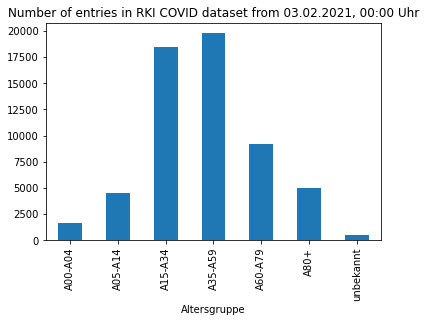

In [31]:
data_berlin.groupby('Altersgruppe').size().plot(
    kind='bar', 
    title=f'Number of entries in RKI COVID dataset from {data["Datenstand"].unique()[0]}'
)

#### Example 2: Get group sum with `sum()`

Get the sum of current cases, deaths, and recoveries. 

The columns needed have the following names:

- `AnzahlFall`: Number of cases in group
- `AnzahlTodesfall`: Number of deaths in group
- `AnzahlGenesen`: Number of recoveries in group

In [32]:
print(f'Total number of current COVID-19 cases in Berlin:')
data_berlin['AnzahlFall'].sum()

Total number of current COVID-19 cases in Berlin:


120709

In [33]:
print(f'Total number of COVID-19 associated cases in Berlin:')
data_berlin['AnzahlTodesfall'].sum()

Total number of COVID-19 associated cases in Berlin:


2327

In [34]:
print(f'Total number of COVID-19 recoveries in Berlin:')
data_berlin['AnzahlGenesen'].sum()

Total number of COVID-19 recoveries in Berlin:


108540

Get number of current COVID-19 cases by Berlin's districts and compare your findings to the official COVID-19 table for Berlin: 

https://www.berlin.de/lageso/gesundheit/infektionsepidemiologie-infektionsschutz/corona/tabelle-bezirke/

In [35]:
data_berlin.groupby('Landkreis')['AnzahlFall'].sum()

Landkreis
SK Berlin Charlottenburg-Wilmersdorf    10293
SK Berlin Friedrichshain-Kreuzberg      10385
SK Berlin Lichtenberg                    7173
SK Berlin Marzahn-Hellersdorf            6640
SK Berlin Mitte                         15462
SK Berlin Neukölln                      14472
SK Berlin Pankow                        10316
SK Berlin Reinickendorf                  9359
SK Berlin Spandau                        9096
SK Berlin Steglitz-Zehlendorf            8859
SK Berlin Tempelhof-Schöneberg          12235
SK Berlin Treptow-Köpenick               6419
Name: AnzahlFall, dtype: int64

#### _Your turn_: Exercises

Let's meet in small groups and work on a few exercises. Afterwards, we will discuss them shortly together.

__Exercise 11__: Since the `groupby` functionality is very powerful but also at first difficult to wraps our head around, go through the first two examples above again in your group and discuss questions.

__Exercise 12__: Get the number of COVID-19 recoveries in Berlin grouped by Berlin's districts.

__Exercise 13__: Plot the number of current COVID-19 cases in Berlin grouped by Berlin's districts (barplot).

## 6. Discussion

In this notebook, we saw how quickly possible it is to read in a csv file as `DataFrame` (*Chapter 5.2*) and to start working with it. 
- We got a first impression on our COVID-19 Berlin dataset. We looked at the number of data points (`DataFrame` rows) and criteria (`DataFrame` columns) as well as some example data points, see *Chapter 5.3*.
- We selected interesting columns and checked what kind of column entries we can except, see *Chapter 5.4 and 5.5*. 
- We grouped data by certain criteria (columns), and applied operations on these groups, e.g. we counted the number of group entries or got the sum within each group). We also did some first steps towards plotting with `pandas`, see *Chapter 5.6*. 



## 7. Final exercise

As promised at the beginning, you will get your own dataset now :)

Last year during the course, we could only work with COVID-19 cases data but luckily, this year, we have something positive to look at as well - the vaccination progress in Germany! You can find that data online again at the [RKI website](https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Daten/Impfquoten-Tab.html) (under the "Daten" section).

1. Let's load the dataset (in a small preprocessing step, the website's excel file was converted into a csv file):

In [36]:
vaccination_monitoring = pd.read_csv("https://github.com/volkamerlab/ai_in_medicine/raw/update-2021.02/data/20210203_Impfquotenmonitoring_RKI.csv")

# Cast "Datum" column to date type
vaccination_monitoring["Datum"] = pd.to_datetime(vaccination_monitoring["Datum"])
vaccination_monitoring.head()

,Datum,Erstimpfung,Zweitimpfung,Gesamtzahl verabreichter Impfstoffdosen
0,2020-12-27,23860.0,0.0,23860.0
1,2020-12-28,19835.0,0.0,19835.0
2,2020-12-29,43246.0,0.0,43246.0
3,2020-12-30,57757.0,0.0,57757.0
4,2020-12-31,38058.0,0.0,38058.0


__Note__: If we worked locally (data files locally on our computer), we could also use `pandas` to the excel file directly.

2. Select only rows that you need for the vaccination time series.

3. Set the date as the `DataFrame` index. Use `pandas.DataFrame.set_index(column_name)` for that.

4. Plot the time series.

5. Use `pd.DataFrame.cumsum()` to generate a DataFrame with cummulutive data and plot again.

6. Compare your results to the data on the BMG website: https://impfdashboard.de/

__Solutions__

__A word of encouragement :)__ 

Before you take a look at the solutions, try to solve the exercises yourself. 

All the information needed lives in _5. Practical_ - if you are stuck, first take a look at the material there. Talk to your fellow students. If you have a solution, then go ahead and take a look here.

Also note that the solutions given here show only one possibility - most of the times there are multiple options to achieve the same end result.

<details>
<summary> > Solution 1</summary>
    
```python
data.head(4)
data.tail()
```
    
</details>

<details>
<summary> > Solution 2</summary>
    
```python
len(data.columns)
data.columns[2]
```
    
</details>

<details>
<summary> > Solution 3</summary>
    
```python
pd.DataFrame(
    [
        ["France", "Gewürztraminer", True], 
        ["Australia", "divers nature", True], 
        ["Israel", "hummus", True], 
        ["Iceland", "language", False]
    ], 
    columns=["country", "awesome because of", "been there"]
)
```
    
</details>

<details>
<summary> > Solution 4</summary>
    
```python
data[["AnzahlFall", "AnzahlTodesfall", "AnzahlGenesen"]]
```
    
</details>

<details>
<summary> > Solution 5</summary>
    
```python
data.loc[:, ["AnzahlFall", "AnzahlTodesfall", "AnzahlGenesen"]]
```
    
</details>

<details>
<summary> > Solution 6</summary>
    
```python
data.iloc[:, [4, 5, 6]]
```
    
</details>

<details>
<summary> > Solution 7</summary>
    
```python
data["Altersgruppe"].unique()
```
    
</details>

<details>
<summary> > Solution 8</summary>
    
```python
len(data["Landkreis"].unique())
```
    
</details>

<details>
<summary> > Solution 9</summary>
    
```python
data[data["Landkreis"] == "SK Berlin Mitte"]
```
    
</details>

<details>
<summary> > Solution 10</summary>
    
```python
data[
    (data["Bundesland"] == "Berlin") & 
    (data["Altersgruppe"] == "A35-A59")
]
```
    
</details>

<details>
<summary> > Solution 11</summary>
    
Go through _Chapter 5.6._ one more time.
    
</details>

<details>
<summary> > Solution 12</summary>
    
```python
data.groupby('Landkreis')['AnzahlGenesen'].sum()
```
    
</details>

<details>
<summary> > Solution 13</summary>
    
```python
data.groupby('Altersgruppe')['AnzahlFall'].sum().plot(
    kind='bar', 
    title=f'Number of COVID-19 cases in Berlin'
)
```
    
</details>

<details>
<summary> > Solution to final exercise</summary>
    
```python
vaccination_monitoring_selected = vaccination_monitoring[:-1]
vaccination_monitoring_selected = vaccination_monitoring_selected.set_index("Datum")
vaccination_monitoring_selected.plot();

vaccination_monitoring_selected.cumsum().plot();
```
    
</details>